<a href="https://colab.research.google.com/github/Zohrae/TPDL/blob/main/TP_04_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git add "TP 04 -DL.ipynb"
!git commit --amend -m "Ajout du notebook sans token"

[main 660e0c7] Ajout du notebook sans token
 Date: Sun Dec 14 19:05:29 2025 +0000
 1 file changed, 1 insertion(+)
 create mode 100644 TP 04 -DL.ipynb


In [ ]:
!git config --global credential.helper store
!git push https://Zohrae@github.com/Zohrae/TPDL.git

fatal: could not read Password for 'https://Zohrae@github.com': No such device or address


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import os

In [ ]:
# ============================================================
# 2a) CRÉATION DU MODÈLE CNN
# ============================================================

def create_cnn_model(input_shape=(128, 128, 3), num_classes=3):
    """
    Architecture CNN personnalisée pour la classification du kératocône
    """
    model = models.Sequential([
        # Bloc 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Bloc 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Bloc 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Bloc 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),

        # Couches Dense
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Créer le modèle
model = create_cnn_model()

# Afficher l'architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,442,851 (5.50 MB)

 Trainable params: 1,439,395 (5.49 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [ ]:
# ============================================================
# 2b) COMPILATION ET ENTRAÎNEMENT DU MODÈLE
# ============================================================

# Chemins vers les répertoires
train_dir = '/content/drive/MyDrive/ElvFront_DataSet/ELVFRONT_TRAIN'
test_dir = '/content/drive/MyDrive/ElvFront_DataSet/ELVFRONT_TEST'

# Paramètres d'entraînement
BATCH_SIZE = 32
EPOCHS = 50
IMG_SIZE = (128, 128)

# Data Augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    fill_mode='nearest'
)

# Seulement rescale pour le test
test_datagen = ImageDataGenerator(rescale=1./255)

# Chargement des données
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Afficher les classes
print("\nClasses détectées :", train_data.class_indices)
print(f"Nombre d'images d'entraînement : {train_data.samples}")
print(f"Nombre d'images de test : {test_data.samples}")


Found 2048 images belonging to 3 classes.
Found 876 images belonging to 3 classes.

Classes détectées : {'Keratoconus': 0, 'Normal': 1, 'Suspicious': 2}
Nombre d'images d'entraînement : 2048
Nombre d'images de test : 876


In [ ]:
# Compilation du modèle
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

In [ ]:
# Entraînement
print("\n" + "="*60)
print("DÉBUT DE L'ENTRAÎNEMENT")
print("="*60)

history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=test_data,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\n" + "="*60)
print("ENTRAÎNEMENT TERMINÉ")
print("="*60)


DÉBUT DE L'ENTRAÎNEMENT


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1480s 23s/step - accuracy: 0.4804 - loss: 1.5402 - val_accuracy: 0.5799 - val_loss: 1.5402 - learning_rate: 0.0010
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 383s 6s/step - accuracy: 0.6136 - loss: 0.9618 - val_accuracy: 0.1164 - val_loss: 2.1556 - learning_rate: 0.0010
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 446s 6s/step - accuracy: 0.6114 - loss: 0.9767 - val_accuracy: 0.1164 - val_loss: 6.7770 - learning_rate: 0.0010
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 382s 6s/step - accuracy: 0.7106 - loss: 0.7515 - val_accuracy: 0.1575 - val_loss: 2.4918 - learning_rate: 0.0010
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 386s 6s/step - accuracy: 0.7034 - loss: 0.7630 - val_accuracy: 0.6176 - val_loss: 2.2636 - learning_rate: 0.0010
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7293 - loss: 0.6359
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
64/64 ━━━━━━━━━━━━━━━━━━━━ 379s 6s/step - accuracy: 0.7295 - loss: 0.6356 - val_accu

In [ ]:
# ============================================================
# 2c) TEST DU MODÈLE
# ============================================================

print("\n" + "="*60)
print("ÉVALUATION SUR LES DONNÉES DE TEST")
print("="*60)

test_loss, test_accuracy = model.evaluate(test_data)
print(f"\nLoss sur test : {test_loss:.4f}")
print(f"Accuracy sur test : {test_accuracy:.4f}")


ÉVALUATION SUR LES DONNÉES DE TEST
28/28 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5914 - loss: 1.0330

Loss sur test : 1.5402
Accuracy sur test : 0.5799


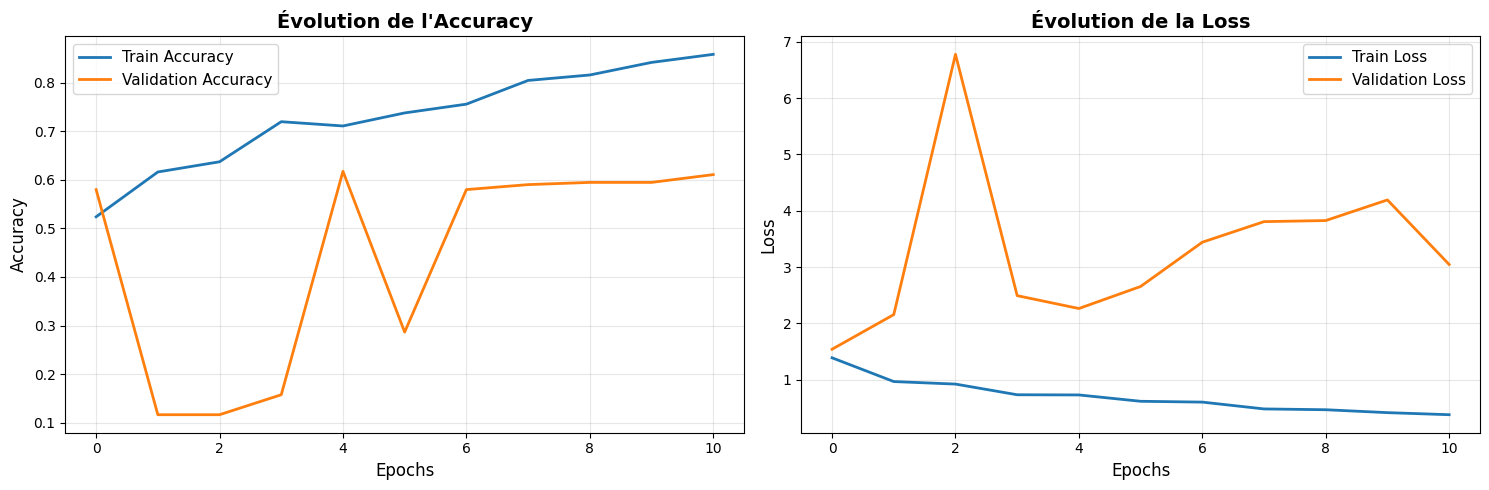

In [ ]:
# ============================================================
# 2d) COURBES D'ÉVOLUTION ACCURACY/LOSS
# ============================================================

def plot_training_history(history):
    """
    Affiche les courbes d'accuracy et de loss
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Accuracy
    axes[0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0].set_title('Évolution de l\'Accuracy', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Epochs', fontsize=12)
    axes[0].set_ylabel('Accuracy', fontsize=12)
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)

    # Loss
    axes[1].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[1].set_title('Évolution de la Loss', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Epochs', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
# ============================================================
# 2e) MÉTRIQUES D'ÉVALUATION COMPLÈTES
# ============================================================

# Prédictions sur l'ensemble de test
y_pred_proba = model.predict(test_data)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = test_data.classes

# Noms des classes
class_names = list(train_data.class_indices.keys())
print(f"\nClasses : {class_names}")

# -------- 1. Classification Report (Precision, Recall, F1-Score) --------
print("\n" + "="*60)
print("RAPPORT DE CLASSIFICATION")
print("="*60)
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))


28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step

Classes : ['Keratoconus', 'Normal', 'Suspicious']

RAPPORT DE CLASSIFICATION
              precision    recall  f1-score   support

 Keratoconus     0.0000    0.0000    0.0000       102
      Normal     0.5799    1.0000    0.7341       508
  Suspicious     0.0000    0.0000    0.0000       266

    accuracy                         0.5799       876
   macro avg     0.1933    0.3333    0.2447       876
weighted avg     0.3363    0.5799    0.4257       876



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



MATRICE DE CONFUSION


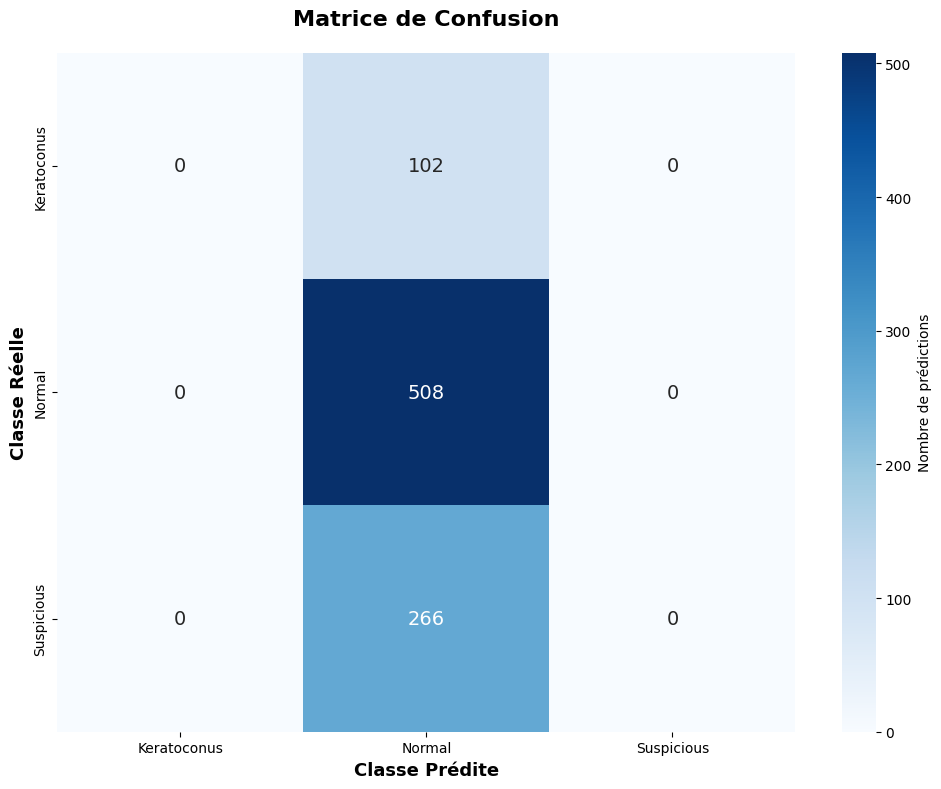

In [ ]:
# -------- 2. Matrice de Confusion --------
print("\n" + "="*60)
print("MATRICE DE CONFUSION")
print("="*60)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Nombre de prédictions'},
            annot_kws={'size': 14})
plt.title('Matrice de Confusion', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Classe Prédite', fontsize=13, fontweight='bold')
plt.ylabel('Classe Réelle', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# -------- 3. Calcul de l'AUC (Area Under Curve) --------
print("\n" + "="*60)
print("CALCUL DE L'AUC (ROC)")
print("="*60)

# Binariser les labels pour le calcul multi-classe
y_true_bin = label_binarize(y_true, classes=range(len(class_names)))

# Calculer l'AUC pour chaque classe
auc_scores = {}
for i, class_name in enumerate(class_names):
    auc_score = roc_auc_score(y_true_bin[:, i], y_pred_proba[:, i])
    auc_scores[class_name] = auc_score
    print(f"AUC pour {class_name:15s} : {auc_score:.4f}")

# AUC macro-average
auc_macro = roc_auc_score(y_true_bin, y_pred_proba, average='macro', multi_class='ovr')
print(f"\nAUC Macro-Average : {auc_macro:.4f}")



CALCUL DE L'AUC (ROC)
AUC pour Keratoconus     : 0.8923
AUC pour Normal          : 0.5638
AUC pour Suspicious      : 0.5480

AUC Macro-Average : 0.6680



GÉNÉRATION DES COURBES ROC


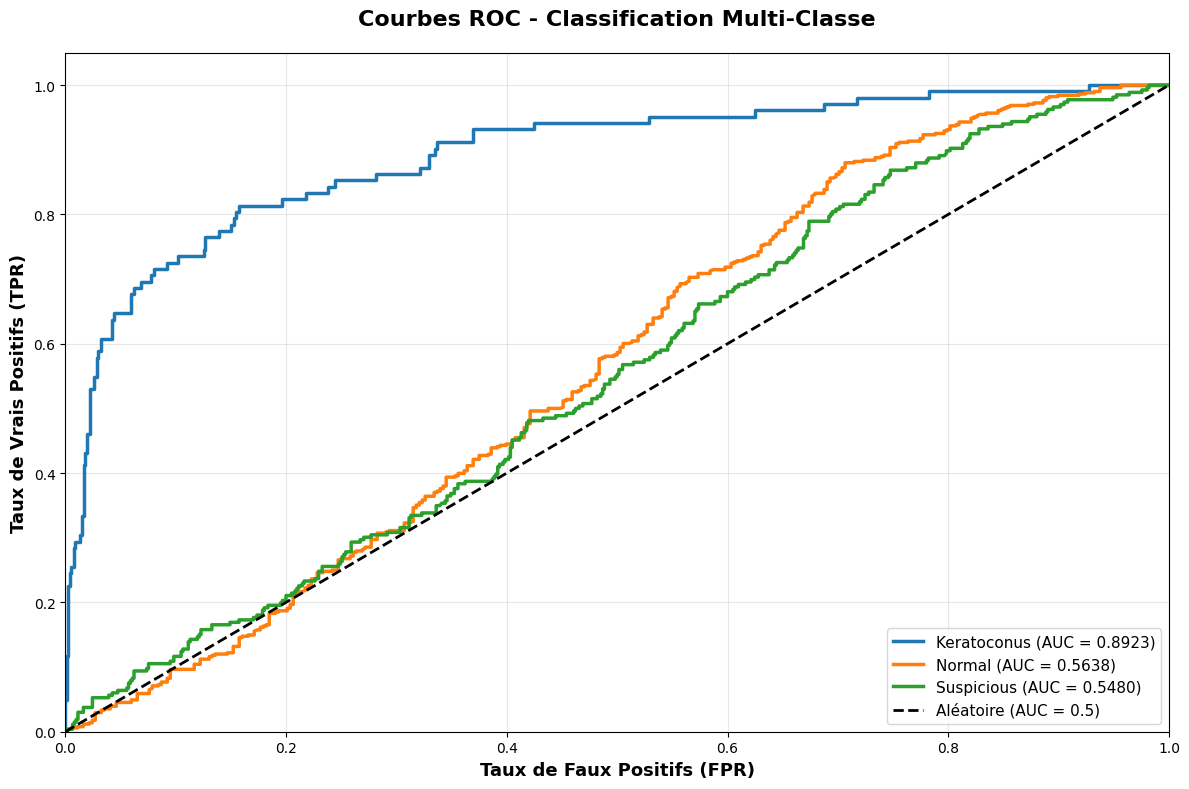

In [ ]:
# -------- 4. Courbes ROC pour chaque classe --------
print("\n" + "="*60)
print("GÉNÉRATION DES COURBES ROC")
print("="*60)

plt.figure(figsize=(12, 8))

for i, class_name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, linewidth=2.5,
             label=f'{class_name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Aléatoire (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=13, fontweight='bold')
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=13, fontweight='bold')
plt.title('Courbes ROC - Classification Multi-Classe', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# ============================================================
# RÉSUMÉ FINAL
# ============================================================

print("\n" + "="*60)
print("RÉSUMÉ DES PERFORMANCES")
print("="*60)
print(f"Accuracy globale : {test_accuracy:.4f}")
print(f"Loss globale     : {test_loss:.4f}")
print(f"AUC Macro        : {auc_macro:.4f}")
print("="*60)


RÉSUMÉ DES PERFORMANCES
Accuracy globale : 0.5799
Loss globale     : 1.5402
AUC Macro        : 0.6680


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import os

print("🚀 Démarrage de l'entraînement Bagging amélioré")
print("="*70)


🚀 Démarrage de l'entraînement Bagging amélioré


In [ ]:
# ============================================================
# ÉTAPE 1 : CONFIGURATION ET CHARGEMENT DES DONNÉES
# ============================================================

# Chemins (ajustez selon votre Drive)
train_dir = '/content/drive/MyDrive/ElvFront_DataSet/ELVFRONT_TRAIN'
test_dir = '/content/drive/MyDrive/ElvFront_DataSet/ELVFRONT_TEST'

# Paramètres
BATCH_SIZE = 32
EPOCHS = 50  # Augmenté pour meilleure convergence
IMG_SIZE = (128, 128)
N_MODELS = 5  # Nombre de modèles dans l'ensemble

print("\n📁 Configuration:")
print(f"   • Taille des images  : {IMG_SIZE}")
print(f"   • Batch size         : {BATCH_SIZE}")
print(f"   • Époques max        : {EPOCHS}")
print(f"   • Nombre de modèles  : {N_MODELS}")



📁 Configuration:
   • Taille des images  : (128, 128)
   • Batch size         : 32
   • Époques max        : 50
   • Nombre de modèles  : 5


In [ ]:
# ============================================================
# ÉTAPE 2 : PRÉPARATION DES GÉNÉRATEURS DE DONNÉES
# ============================================================

print("\n📊 Chargement des données...")

# Data Augmentation RENFORCÉE pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,           # Augmenté
    width_shift_range=0.3,       # Augmenté
    height_shift_range=0.3,      # Augmenté
    horizontal_flip=True,
    vertical_flip=True,          # Ajouté
    zoom_range=0.3,              # Augmenté
    brightness_range=[0.8, 1.2], # Ajouté pour varier l'illumination
    shear_range=0.2,             # Ajouté pour distorsion
    fill_mode='nearest'
)

# Test : seulement rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Charger les données
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important pour évaluation
)

# Récupérer les noms de classes
class_names = list(train_data.class_indices.keys())
num_classes = len(class_names)

print(f"\n✓ Classes détectées : {class_names}")
print(f"✓ Nombre d'images train : {train_data.samples}")
print(f"✓ Nombre d'images test  : {test_data.samples}")


📊 Chargement des données...
Found 2048 images belonging to 3 classes.
Found 876 images belonging to 3 classes.

✓ Classes détectées : ['Keratoconus', 'Normal', 'Suspicious']
✓ Nombre d'images train : 2048
✓ Nombre d'images test  : 876


In [ ]:
# Afficher la distribution des classes
print("\n📊 Distribution des classes (TRAIN):")
train_class_counts = np.bincount(train_data.classes)
for i, class_name in enumerate(class_names):
    count = train_class_counts[i]
    percentage = (count / train_data.samples) * 100
    print(f"   • {class_name:15s} : {count:4d} images ({percentage:5.2f}%)")

print("\n📊 Distribution des classes (TEST):")
test_class_counts = np.bincount(test_data.classes)
for i, class_name in enumerate(class_names):
    count = test_class_counts[i]
    percentage = (count / test_data.samples) * 100
    print(f"   • {class_name:15s} : {count:4d} images ({percentage:5.2f}%)")



📊 Distribution des classes (TRAIN):
   • Keratoconus     :  239 images (11.67%)
   • Normal          : 1187 images (57.96%)
   • Suspicious      :  622 images (30.37%)

📊 Distribution des classes (TEST):
   • Keratoconus     :  102 images (11.64%)
   • Normal          :  508 images (57.99%)
   • Suspicious      :  266 images (30.37%)


In [ ]:
# ============================================================
# ÉTAPE 3 : CALCUL DES POIDS DE CLASSE (CRITIQUE!)
# ============================================================

print("\n⚖️  Calcul des poids de classe pour gérer le déséquilibre...")

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)

class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("\n✓ Poids de classe calculés:")
for i, class_name in enumerate(class_names):
    print(f"   • {class_name:15s} : {class_weight_dict[i]:.4f}")



⚖️  Calcul des poids de classe pour gérer le déséquilibre...

✓ Poids de classe calculés:
   • Keratoconus     : 2.8563
   • Normal          : 0.5751
   • Suspicious      : 1.0975


In [ ]:
# ============================================================
# ÉTAPE 4 : DÉFINITION DE L'ARCHITECTURE CNN
# ============================================================

def create_cnn_model(input_shape=(128, 128, 3), num_classes=3, name="CNN"):
    """
    Architecture CNN optimisée pour la classification du kératocône
    """
    model = models.Sequential([
        # Bloc 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Bloc 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Bloc 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        # Bloc 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),

        # Couches Dense
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ], name=name)

    return model

print("\n🏗️  Architecture CNN définie")



🏗️  Architecture CNN définie


In [ ]:
# ============================================================
# ÉTAPE 5 : CHARGEMENT DES DONNÉES EN MÉMOIRE POUR BOOTSTRAP
# ============================================================

print("\n📥 Chargement des données d'entraînement en mémoire...")
print("   (Nécessaire pour créer de vrais bootstrap samples)")

# Charger toutes les données d'entraînement
X_train_list = []
y_train_list = []

# Calculer le nombre de batchs nécessaires
n_batches = int(np.ceil(train_data.samples / train_data.batch_size))

print(f"   • Chargement de {n_batches} batchs...")

for i in range(n_batches):
    batch_x, batch_y = train_data[i]
    X_train_list.append(batch_x)
    y_train_list.append(batch_y)

    if (i + 1) % 10 == 0:
        print(f"   • Progression: {i+1}/{n_batches} batchs chargés")

# Concaténer et tronquer à la taille exacte
X_train = np.vstack(X_train_list)[:train_data.samples]
y_train = np.vstack(y_train_list)[:train_data.samples]

print(f"\n✓ Données chargées en mémoire:")
print(f"   • Shape X_train : {X_train.shape}")
print(f"   • Shape y_train : {y_train.shape}")

# Libérer la mémoire
del X_train_list, y_train_list



📥 Chargement des données d'entraînement en mémoire...
   (Nécessaire pour créer de vrais bootstrap samples)
   • Chargement de 64 batchs...
   • Progression: 10/64 batchs chargés
   • Progression: 20/64 batchs chargés
   • Progression: 30/64 batchs chargés
   • Progression: 40/64 batchs chargés
   • Progression: 50/64 batchs chargés
   • Progression: 60/64 batchs chargés

✓ Données chargées en mémoire:
   • Shape X_train : (2048, 128, 128, 3)
   • Shape y_train : (2048, 3)


In [ ]:
# ============================================================
# ÉTAPE 6 : CLASSE BAGGING AMÉLIORÉE
# ============================================================

class ImprovedBaggingEnsemble:
    """
    Ensemble Bagging avec vrais bootstrap samples et class weights
    """
    def __init__(self, n_models=5, base_model_fn=create_cnn_model):
        self.n_models = n_models
        self.models = []
        self.base_model_fn = base_model_fn
        self.histories = []

    def create_bootstrap_sample(self, X, y, seed):
        """
        Crée un vrai bootstrap sample avec remise
        """
        np.random.seed(seed)
        n_samples = len(X)

        # Échantillonnage avec remise
        bootstrap_indices = np.random.choice(
            n_samples,
            size=n_samples,
            replace=True  # CRITIQUE : avec remise
        )

        X_boot = X[bootstrap_indices]
        y_boot = y[bootstrap_indices]

        # Afficher la distribution
        y_boot_classes = np.argmax(y_boot, axis=1)
        unique, counts = np.unique(y_boot_classes, return_counts=True)

        print(f"   📊 Distribution du bootstrap {seed}:")
        for cls_idx, count in zip(unique, counts):
            class_name = class_names[cls_idx]
            percentage = (count / len(y_boot)) * 100
            print(f"      • {class_name:15s} : {count:4d} ({percentage:5.2f}%)")

        return X_boot, y_boot

    def fit(self, X_train, y_train, validation_data, class_weights, epochs=50):
        """
        Entraîne N modèles sur des bootstrap samples différents
        """
        print(f"\n{'='*70}")
        print(f"🔄 ENTRAÎNEMENT DE {self.n_models} MODÈLES BAGGING")
        print(f"{'='*70}")

        for i in range(self.n_models):
            print(f"\n{'─'*70}")
            print(f"📦 MODÈLE BAGGING {i+1}/{self.n_models}")
            print(f"{'─'*70}")

            # Créer un bootstrap sample unique
            X_boot, y_boot = self.create_bootstrap_sample(X_train, y_train, seed=42+i*100)

            # Créer et compiler le modèle
            model = self.base_model_fn(
                input_shape=X_train.shape[1:],
                num_classes=y_train.shape[1],
                name=f"Bagging_Model_{i+1}"
            )

            model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            # Callbacks avec patience augmentée
            early_stop = EarlyStopping(
                monitor='val_loss',
                patience=15,  # Plus patient
                restore_best_weights=True,
                verbose=1
            )

            reduce_lr = ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=7,
                min_lr=1e-7,
                verbose=1
            )

            print(f"\n🏋️  Entraînement du modèle {i+1}...")

            # Entraînement avec class weights
            history = model.fit(
                X_boot, y_boot,
                epochs=epochs,
                batch_size=32,
                validation_data=validation_data,
                class_weight=class_weights,  # ⭐ CRITIQUE
                callbacks=[early_stop, reduce_lr],
                verbose=1
            )

            # Sauvegarder
            self.models.append(model)
            self.histories.append(history)

            # Évaluation sur validation
            val_loss, val_acc = model.evaluate(validation_data, verbose=0)

            print(f"\n✓ Modèle {i+1} terminé:")
            print(f"   • Val Accuracy : {val_acc:.4f}")
            print(f"   • Val Loss     : {val_loss:.4f}")
            print(f"   • Époques      : {len(history.history['loss'])}")

            # Vérifier la distribution des prédictions
            val_preds = model.predict(validation_data, verbose=0)
            val_pred_classes = np.argmax(val_preds, axis=1)
            unique, counts = np.unique(val_pred_classes, return_counts=True)

            print(f"   📊 Distribution prédictions validation:")
            for cls_idx, count in zip(unique, counts):
                class_name = class_names[cls_idx]
                percentage = (count / len(val_pred_classes)) * 100
                print(f"      • {class_name:15s} : {count:4d} ({percentage:5.2f}%)")

            # Vérifier si le modèle ne prédit qu'une classe
            if len(unique) == 1:
                print(f"   ⚠️  ATTENTION : Le modèle prédit uniquement '{class_names[unique[0]]}'!")

        print(f"\n{'='*70}")
        print(f"✅ BAGGING TERMINÉ : {self.n_models} modèles entraînés")
        print(f"{'='*70}")

    def predict(self, test_data):
        """
        Prédiction par moyenne des probabilités
        """
        print("\n🔮 Prédiction de l'ensemble Bagging...")

        predictions = []
        for i, model in enumerate(self.models):
            print(f"   • Prédiction modèle {i+1}/{self.n_models}...", end=" ")
            pred = model.predict(test_data, verbose=0)
            predictions.append(pred)
            print("✓")

        # Moyenne des prédictions
        avg_predictions = np.mean(predictions, axis=0)

        print("✓ Prédictions moyennées")

        return avg_predictions

    def plot_training_histories(self):
        """
        Affiche les courbes d'entraînement de tous les modèles
        """
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        for i, history in enumerate(self.histories):
            # Accuracy
            axes[0].plot(history.history['accuracy'],
                        label=f'Train M{i+1}', alpha=0.6)
            axes[0].plot(history.history['val_accuracy'],
                        label=f'Val M{i+1}', alpha=0.6, linestyle='--')

            # Loss
            axes[1].plot(history.history['loss'],
                        label=f'Train M{i+1}', alpha=0.6)
            axes[1].plot(history.history['val_loss'],
                        label=f'Val M{i+1}', alpha=0.6, linestyle='--')

        axes[0].set_title('Accuracy - Tous les modèles Bagging',
                         fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Époques')
        axes[0].set_ylabel('Accuracy')
        axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
        axes[0].grid(True, alpha=0.3)

        axes[1].set_title('Loss - Tous les modèles Bagging',
                         fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Époques')
        axes[1].set_ylabel('Loss')
        axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

In [ ]:
# ============================================================
# ÉTAPE 7 : ENTRAÎNEMENT DU BAGGING
# ============================================================

print("\n" + "="*70)
print("DÉMARRAGE DE L'ENTRAÎNEMENT BAGGING")
print("="*70)

# Créer l'ensemble Bagging
bagging_ensemble = ImprovedBaggingEnsemble(n_models=N_MODELS)

# Entraîner
bagging_ensemble.fit(
    X_train=X_train,
    y_train=y_train,
    validation_data=test_data,
    class_weights=class_weight_dict,
    epochs=EPOCHS
)


DÉMARRAGE DE L'ENTRAÎNEMENT BAGGING

🔄 ENTRAÎNEMENT DE 5 MODÈLES BAGGING

──────────────────────────────────────────────────────────────────────
📦 MODÈLE BAGGING 1/5
──────────────────────────────────────────────────────────────────────
   📊 Distribution du bootstrap 42:
      • Keratoconus     :  214 (10.45%)
      • Normal          : 1206 (58.89%)
      • Suspicious      :  628 (30.66%)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🏋️  Entraînement du modèle 1...
Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.3892 - loss: 1.6595

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 596s 9s/step - accuracy: 0.3894 - loss: 1.6574 - val_accuracy: 0.3037 - val_loss: 1.4567 - learning_rate: 0.0010
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 423s 7s/step - accuracy: 0.4456 - loss: 1.1506 - val_accuracy: 0.5297 - val_loss: 0.9397 - learning_rate: 0.0010
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 418s 7s/step - accuracy: 0.4566 - loss: 1.0563 - val_accuracy: 0.5799 - val_loss: 1.6893 - learning_rate: 0.0010
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 419s 7s/step - accuracy: 0.5015 - loss: 1.0016 - val_accuracy: 0.5776 - val_loss: 1.0507 - learning_rate: 0.0010
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 443s 7s/step - accuracy: 0.5330 - loss: 0.8235 - val_accuracy: 0.3071 - val_loss: 1.3822 - learning_rate: 0.0010
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 420s 7s/step - accuracy: 0.6095 - loss: 0.7187 - val_accuracy: 0.3744 - val_loss: 1.4977 - learning_rate: 0.0010
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 418s 7s/step - accuracy: 0.5584 - loss: 0.7795 - val_accuracy: 0.36

In [ ]:
# ============================================================
# ÉTAPE 8 : ÉVALUATION COMPLÈTE
# ============================================================

print("\n" + "="*70)
print("📊 ÉVALUATION DE L'ENSEMBLE BAGGING")
print("="*70)

# Prédictions
y_pred_proba = bagging_ensemble.predict(test_data)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = test_data.classes

# Calculer les métriques
accuracy = np.mean(y_pred == y_true)
y_true_bin = label_binarize(y_true, classes=range(num_classes))
auc_macro = roc_auc_score(y_true_bin, y_pred_proba, average='macro', multi_class='ovr')

print(f"\n✅ RÉSULTATS GLOBAUX:")
print(f"   • Accuracy : {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"   • AUC      : {auc_macro:.4f}")

# Distribution des prédictions
print(f"\n📊 Distribution des prédictions finales:")
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)
for cls_idx, count in zip(unique_pred, counts_pred):
    class_name = class_names[cls_idx]
    percentage = (count / len(y_pred)) * 100
    print(f"   • {class_name:15s} : {count:4d} ({percentage:5.2f}%)")

# Vérifier si problème de prédiction unique
if len(unique_pred) < num_classes:
    print(f"\n⚠️  ATTENTION : Le modèle ne prédit pas toutes les classes!")
    missing_classes = set(range(num_classes)) - set(unique_pred)
    for cls_idx in missing_classes:
        print(f"   • Classe '{class_names[cls_idx]}' jamais prédite")

# Classification Report
print("\n" + "─"*70)
print("📋 RAPPORT DE CLASSIFICATION DÉTAILLÉ")
print("─"*70)
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# AUC par classe
print("\n" + "─"*70)
print("📈 AUC PAR CLASSE")
print("─"*70)
for i, class_name in enumerate(class_names):
    auc_score = roc_auc_score(y_true_bin[:, i], y_pred_proba[:, i])
    print(f"   • {class_name:15s} : {auc_score:.4f}")


**Stacking**

In [ ]:
# ============================================================
# STACKING CORRIGÉ - PLUS DE DONNÉES
# ============================================================

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import os

print("🚀 STACKING CORRIGÉ")
print("="*70)

# ============================================================
# CONFIGURATION
# ============================================================

train_dir = '/content/drive/MyDrive/ElvFront_DataSet/ELVFRONT_TRAIN'
test_dir = '/content/drive/MyDrive/ElvFront_DataSet/ELVFRONT_TEST'

BATCH_SIZE = 32
EPOCHS = 40  # Plus d'époques
IMG_SIZE = (128, 128)
N_BASE_MODELS = 3  # ⭐ Réduire à 3 modèles pour qu'ils convergent mieux
N_FOLDS = 3
INITIAL_LR = 0.0003  # ⭐ LR plus bas

print(f"\n📁 Configuration:")
print(f"   • Images          : {IMG_SIZE}")
print(f"   • Batch           : {BATCH_SIZE}")
print(f"   • Époques         : {EPOCHS}")
print(f"   • Modèles base    : {N_BASE_MODELS}")
print(f"   • K-Folds         : {N_FOLDS}")
print(f"   • Learning Rate   : {INITIAL_LR}")

# ============================================================
# CHARGEMENT DONNÉES
# ============================================================

print("\n📊 Chargement données...")

# ⭐ AUGMENTATION PLUS FORTE
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=0.15,  # ⭐ Ajout shear
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

class_names = list(train_data.class_indices.keys())
num_classes = len(class_names)

print(f"\n✓ Classes : {class_names}")
print(f"✓ Train : {train_data.samples}, Test : {test_data.samples}")

# ============================================================
# CHARGEMENT EN MÉMOIRE
# ============================================================

print("\n📥 Chargement en mémoire...")

X_train_list, y_train_list = [], []
n_batches = int(np.ceil(train_data.samples / train_data.batch_size))

for i in range(n_batches):
    batch_x, batch_y = train_data[i]
    X_train_list.append(batch_x)
    y_train_list.append(batch_y)
    if (i + 1) % 20 == 0:
        print(f"   • {i+1}/{n_batches} batchs")

X_train_full = np.vstack(X_train_list)[:train_data.samples]
y_train_full = np.vstack(y_train_list)[:train_data.samples]
y_train_classes_full = np.argmax(y_train_full, axis=1)

X_test_list, y_test_list = [], []
n_batches_test = int(np.ceil(test_data.samples / test_data.batch_size))

for i in range(n_batches_test):
    batch_x, batch_y = test_data[i]
    X_test_list.append(batch_x)
    y_test_list.append(batch_y)

X_test = np.vstack(X_test_list)[:test_data.samples]
y_test = np.vstack(y_test_list)[:test_data.samples]
y_test_classes = np.argmax(y_test, axis=1)

print(f"\n✓ Données train : {X_train_full.shape}")
print(f"✓ Données test  : {X_test.shape}")

del X_train_list, y_train_list, X_test_list, y_test_list

# ============================================================
# ⭐ UTILISER TOUTES LES DONNÉES (juste équilibrage léger)
# ============================================================

print(f"\n⚖️  Équilibrage LÉGER (garder plus de données)...")

class_counts = [np.sum(y_train_classes_full == i) for i in range(num_classes)]
min_count = min(class_counts)

# ⭐ Prendre 3x la classe minoritaire pour avoir BEAUCOUP plus de données
target_count = min(min_count * 3, max(class_counts))

print(f"   • Classe min : {min_count}")
print(f"   • Target     : {target_count} par classe")

balanced_indices = []

for cls_idx in range(num_classes):
    cls_indices = np.where(y_train_classes_full == cls_idx)[0]

    if len(cls_indices) > target_count:
        selected = np.random.choice(cls_indices, target_count, replace=False)
    else:
        selected = np.random.choice(cls_indices, target_count, replace=True)

    balanced_indices.extend(selected)

balanced_indices = np.array(balanced_indices)
np.random.shuffle(balanced_indices)

X_train = X_train_full[balanced_indices]
y_train = y_train_full[balanced_indices]
y_train_classes = np.argmax(y_train, axis=1)

print(f"\n✓ Dataset ÉQUILIBRÉ:")
print(f"   • Total : {len(X_train)}")
for cls_idx in range(num_classes):
    count = np.sum(y_train_classes == cls_idx)
    pct = (count / len(y_train_classes)) * 100
    print(f"   • {class_names[cls_idx]:15s} : {count:4d} ({pct:5.1f}%)")

# ============================================================
# ARCHITECTURE CNN
# ============================================================

def create_cnn_model(input_shape=(128, 128, 3), num_classes=3, name="CNN_Model"):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ], name=name)

    return model

print("\n🏗️  Architecture CNN définie")

# ============================================================
# CLASS WEIGHTS
# ============================================================

def compute_class_weights(y_classes, num_classes):
    class_counts = np.bincount(y_classes, minlength=num_classes)
    total = len(y_classes)
    class_weights = {i: total / (num_classes * count) for i, count in enumerate(class_counts)}
    return class_weights

class_weights = compute_class_weights(y_train_classes, num_classes)
print(f"\n⚖️  Class weights:")
for i, w in class_weights.items():
    print(f"   • {class_names[i]:15s} : {w:.3f}")

# ============================================================
# CLASSE STACKING CORRIGÉE
# ============================================================

class StackingEnsemble:
    def __init__(self, n_base_models=3, n_folds=3):
        self.n_base_models = n_base_models
        self.n_folds = n_folds
        self.base_models = []
        self.meta_model = None
        self.histories = []

    def create_diverse_sample(self, X, y, seed, variation=0.8):
        """Échantillonnage diversifié (pas 100% bootstrap)"""
        np.random.seed(seed)
        n_samples = len(X)
        # ⭐ Prendre 80% des données de manière aléatoire (sans remise complète)
        n_select = int(n_samples * variation)
        indices = np.random.choice(n_samples, size=n_select, replace=False)
        return X[indices], y[indices]

    def train_base_models(self, X_train, y_train, X_val, y_val, class_weights):
        print(f"\n{'='*70}")
        print(f"🔄 NIVEAU 0 - {self.n_base_models} MODÈLES DE BASE")
        print(f"{'='*70}")

        for i in range(self.n_base_models):
            print(f"\n{'─'*70}")
            print(f"📦 MODÈLE BASE {i+1}/{self.n_base_models}")
            print(f"{'─'*70}")

            # ⭐ Échantillonnage diversifié
            X_sample, y_sample = self.create_diverse_sample(X_train, y_train, seed=42+i*100, variation=0.85)

            print(f"✓ Échantillon créé : {X_sample.shape}")

            model = create_cnn_model(
                input_shape=X_train.shape[1:],
                num_classes=y_train.shape[1],
                name=f"Base_M{i+1}"
            )

            # ⭐ LR différents mais pas trop divergents
            lr = INITIAL_LR * (0.95 ** i)

            model.compile(
                optimizer=tf.keras.optimizers.Adam(lr, clipnorm=1.0),
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            early_stop = EarlyStopping(
                monitor='val_accuracy',
                patience=15,  # ⭐ Plus de patience
                mode='max',
                restore_best_weights=True,
                verbose=1
            )

            reduce_lr = ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=7,  # ⭐ Plus de patience
                min_lr=1e-7,
                verbose=1
            )

            print(f"\n🏋️  Entraînement (LR={lr:.6f})...")

            history = model.fit(
                X_sample, y_sample,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data=(X_val, y_val),
                class_weight=class_weights,
                callbacks=[early_stop, reduce_lr],
                verbose=1
            )

            val_pred = model.predict(X_val, verbose=0)
            val_pred_classes = np.argmax(val_pred, axis=1)
            val_true_classes = np.argmax(y_val, axis=1)
            val_accuracy = np.mean(val_pred_classes == val_true_classes)

            print(f"\n✓ Val Accuracy : {val_accuracy:.4f}")

            # Distribution
            print(f"📊 Distribution prédictions:")
            for cls_idx in range(num_classes):
                count = np.sum(val_pred_classes == cls_idx)
                pct = (count / len(val_pred_classes)) * 100
                print(f"   • {class_names[cls_idx]:12s} : {count:3d} ({pct:5.1f}%)")

            # ⭐ Vérification stricte
            unique_preds = np.unique(val_pred_classes)
            if len(unique_preds) < 3:
                print(f"\n⚠️  ATTENTION : Modèle prédit seulement {len(unique_preds)} classe(s) !")
                print(f"   → Modèle quand même ajouté (le meta-modèle compensera)")

            self.base_models.append(model)
            self.histories.append(history)

            print(f"\n✅ Modèle {i+1} ajouté")

        print(f"\n{'='*70}")
        print(f"✅ NIVEAU 0 TERMINÉ : {len(self.base_models)} modèles")
        print(f"{'='*70}")

    def generate_meta_features(self, X_train, y_train):
        print(f"\n{'='*70}")
        print(f"🔄 GÉNÉRATION META-FEATURES ({self.n_folds} folds)")
        print(f"{'='*70}")

        n_samples = len(X_train)
        n_classes = y_train.shape[1]

        meta_features = np.zeros((n_samples, len(self.base_models) * n_classes))

        kf = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)

        for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_train)):
            print(f"\n📊 Fold {fold_idx+1}/{self.n_folds}")
            print(f"   • Val   : {len(val_idx)} samples")

            X_fold_val = X_train[val_idx]

            for model_idx, base_model in enumerate(self.base_models):
                preds = base_model.predict(X_fold_val, verbose=0)

                start_col = model_idx * n_classes
                end_col = start_col + n_classes
                meta_features[val_idx, start_col:end_col] = preds

                print(f"   • M{model_idx+1} ✓")

        print(f"\n✓ Meta-features : {meta_features.shape}")
        return meta_features

    def train_meta_model(self, meta_features, y_train):
        print(f"\n{'='*70}")
        print(f"🔄 NIVEAU 1 - META-MODÈLE")
        print(f"{'='*70}")

        y_train_classes = np.argmax(y_train, axis=1)

        print("\n🎯 Meta-modèle : Logistic Regression")
        self.meta_model = LogisticRegression(
            multi_class='multinomial',
            solver='lbfgs',
            max_iter=2000,  # ⭐ Plus d'itérations
            random_state=42,
            class_weight='balanced',
            C=0.1  # ⭐ Régularisation plus forte
        )

        print("🏋️  Entraînement...")
        self.meta_model.fit(meta_features, y_train_classes)

        train_score = self.meta_model.score(meta_features, y_train_classes)
        print(f"\n✓ Meta-model accuracy : {train_score:.4f}")

        print(f"\n{'='*70}")
        print(f"✅ NIVEAU 1 TERMINÉ")
        print(f"{'='*70}")

    def fit(self, X_train, y_train, X_val, y_val, class_weights):
        print(f"\n{'='*70}")
        print(f"🚀 STACKING COMPLET")
        print(f"{'='*70}")

        self.train_base_models(X_train, y_train, X_val, y_val, class_weights)
        meta_features = self.generate_meta_features(X_train, y_train)
        self.train_meta_model(meta_features, y_train)

        print(f"\n{'='*70}")
        print(f"🎉 TERMINÉ !")
        print(f"{'='*70}")

    def predict(self, X_test):
        print("\n🔮 Prédiction...")

        base_predictions = []
        for i, model in enumerate(self.base_models):
            pred = model.predict(X_test, verbose=0)
            base_predictions.append(pred)
            print(f"   • M{i+1} ✓")

        meta_features = np.hstack(base_predictions)
        print(f"✓ Meta-features : {meta_features.shape}")

        final_pred = self.meta_model.predict_proba(meta_features)
        print("✓ Prédiction finale")

        return final_pred

# ============================================================
# ENTRAÎNEMENT
# ============================================================

print("\n" + "="*70)
print("ENTRAÎNEMENT")
print("="*70)

stacking = StackingEnsemble(n_base_models=N_BASE_MODELS, n_folds=N_FOLDS)

stacking.fit(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    class_weights=class_weights
)

# ============================================================
# ÉVALUATION
# ============================================================

print("\n" + "="*70)
print("📊 ÉVALUATION")
print("="*70)

y_pred_proba = stacking.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = y_test_classes

accuracy = np.mean(y_pred == y_true)
y_true_bin = label_binarize(y_true, classes=range(num_classes))
auc_macro = roc_auc_score(y_true_bin, y_pred_proba, average='macro', multi_class='ovr')

print(f"\n✅ RÉSULTATS STACKING:")
print(f"   • Accuracy : {accuracy:.4f}")
print(f"   • AUC      : {auc_macro:.4f}")

print(f"\n📊 Distribution:")
for cls_idx in range(num_classes):
    count = np.sum(y_pred == cls_idx)
    pct = (count / len(y_pred)) * 100
    print(f"   • {class_names[cls_idx]:15s} : {count:4d} ({pct:5.2f}%)")

print("\n" + "─"*70)
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Matrice confusion
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={'size': 14})
plt.title('Matrice Confusion - Stacking Corrigé', fontsize=16, fontweight='bold')
plt.xlabel('Prédite', fontsize=13, fontweight='bold')
plt.ylabel('Réelle', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

# ROC
plt.figure(figsize=(12, 8))
for i, name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2.5, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Aléatoire')
plt.xlabel('FPR', fontsize=13, fontweight='bold')
plt.ylabel('TPR', fontsize=13, fontweight='bold')
plt.title('Courbes ROC - Stacking', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Historique
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for i, hist in enumerate(stacking.histories):
    axes[0].plot(hist.history['accuracy'], label=f'M{i+1} Train', alpha=0.7)
    axes[0].plot(hist.history['val_accuracy'], label=f'M{i+1} Val', alpha=0.7, linestyle='--')

    axes[1].plot(hist.history['loss'], label=f'M{i+1} Train', alpha=0.7)
    axes[1].plot(hist.history['val_loss'], label=f'M{i+1} Val', alpha=0.7, linestyle='--')

axes[0].set_title('Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].set_title('Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("📊 COMPARAISON")
print("="*70)

print("\n🔍 Modèles de base individuels:")
for i, model in enumerate(stacking.base_models):
    pred = model.predict(X_test, verbose=0)
    pred_classes = np.argmax(pred, axis=1)
    acc = np.mean(pred_classes == y_true)
    print(f"   • M{i+1} : {acc:.4f}")

print(f"\n🌟 Stacking : {accuracy:.4f}")

print(f"\n🎉 TERMINÉ - Accuracy: {accuracy:.4f}, AUC: {auc_macro:.4f}")

🚀 STACKING CORRIGÉ

📁 Configuration:
   • Images          : (128, 128)
   • Batch           : 32
   • Époques         : 40
   • Modèles base    : 3
   • K-Folds         : 3
   • Learning Rate   : 0.0003

📊 Chargement données...
Found 2048 images belonging to 3 classes.
Found 876 images belonging to 3 classes.

✓ Classes : ['Keratoconus', 'Normal', 'Suspicious']
✓ Train : 2048, Test : 876

📥 Chargement en mémoire...
   • 20/64 batchs
   • 40/64 batchs
   • 60/64 batchs

✓ Données train : (2048, 128, 128, 3)
✓ Données test  : (876, 128, 128, 3)

⚖️  Équilibrage LÉGER (garder plus de données)...
   • Classe min : 239
   • Target     : 717 par classe

✓ Dataset ÉQUILIBRÉ:
   • Total : 2151
   • Keratoconus     :  717 ( 33.3%)
   • Normal          :  717 ( 33.3%)
   • Suspicious      :  717 ( 33.3%)

🏗️  Architecture CNN définie

⚖️  Class weights:
   • Keratoconus     : 1.000
   • Normal          : 1.000
   • Suspicious      : 1.000

ENTRAÎNEMENT

🚀 STACKING COMPLET

🔄 NIVEAU 0 - 3 MODÈLES

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



🏋️  Entraînement (LR=0.000300)...
Epoch 1/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 294s 5s/step - accuracy: 0.4779 - loss: 1.1528 - val_accuracy: 0.5799 - val_loss: 1.0035 - learning_rate: 3.0000e-04
Epoch 2/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 313s 5s/step - accuracy: 0.5773 - loss: 0.8608 - val_accuracy: 0.5799 - val_loss: 1.0066 - learning_rate: 3.0000e-04
Epoch 3/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 346s 5s/step - accuracy: 0.6339 - loss: 0.7451 - val_accuracy: 0.5799 - val_loss: 1.2473 - learning_rate: 3.0000e-04
Epoch 4/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 273s 5s/step - accuracy: 0.6524 - loss: 0.7587 - val_accuracy: 0.5799 - val_loss: 1.4431 - learning_rate: 3.0000e-04
Epoch 5/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 301s 5s/step - accuracy: 0.6741 - loss: 0.6889 - val_accuracy: 0.5799 - val_loss: 1.9708 - learning_rate: 3.0000e-04
Epoch 6/40
58/58 ━━━━━━━━━━━━━━━━━━━━ 280s 5s/step - accuracy: 0.7165 - loss: 0.6110 - val_accuracy: 0.5799 - val_loss: 2.5255 - learning_rate: 3.0000e-04
Epoch 7/40
58/58 ━━━━━━━━━━━━━━━━━━